**PACKAGE CALL**

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "postgres",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


# **QUERIES**

In [4]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

# Query- 1

**#Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table**

***DIVISION WISE***

In [5]:
cur = con.cursor()
select_stmt_div = "SELECT  s.division, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "GROUP BY CUBE(s.division) " \
                    "ORDER BY s.division"
cur.execute(select_stmt_div)
records_div = cur.fetchall()
div = pd.DataFrame(list(records_div), columns=['division', 'sales'])
div

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [6]:
div=div.dropna()

In [7]:
changetype(div)

C:\Users\farih\AppData\Local\Temp/ipykernel_19116/369198803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


In [8]:
div=div.set_index(['division'])

<AxesSubplot:ylabel='sales'>

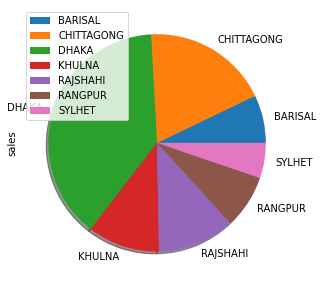

In [9]:
div.plot.pie(y='sales',figsize=(5,5),shadow='True')

In [10]:
cur = con.cursor()
select_stmt_dis = "SELECT  s.district, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "GROUP BY CUBE(s.district) " \
                    "ORDER BY SUM(ft.total_price) ASC"
cur.execute(select_stmt_dis)
records_dis = cur.fetchall()
dis = pd.DataFrame(list(records_dis), columns=['district', 'sales'])
dis

,district,sales
0,MEHERPUR,436755.00
1,NARAIL,440698.75
2,CHUADANGA,563909.75
3,JHALOKATI,570807.25
4,MAGURA,577543.25
...,...,...
60,RAJSHAHI,3756454.50
61,KHULNA,4081283.75
62,CHITTAGONG,7292985.50
63,DHAKA,23597621.00


In [11]:
dis=dis.dropna()

In [12]:
changetype(dis)

C:\Users\farih\AppData\Local\Temp/ipykernel_19116/369198803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


In [13]:
dis.dtypes

district     object
sales       float64
dtype: object

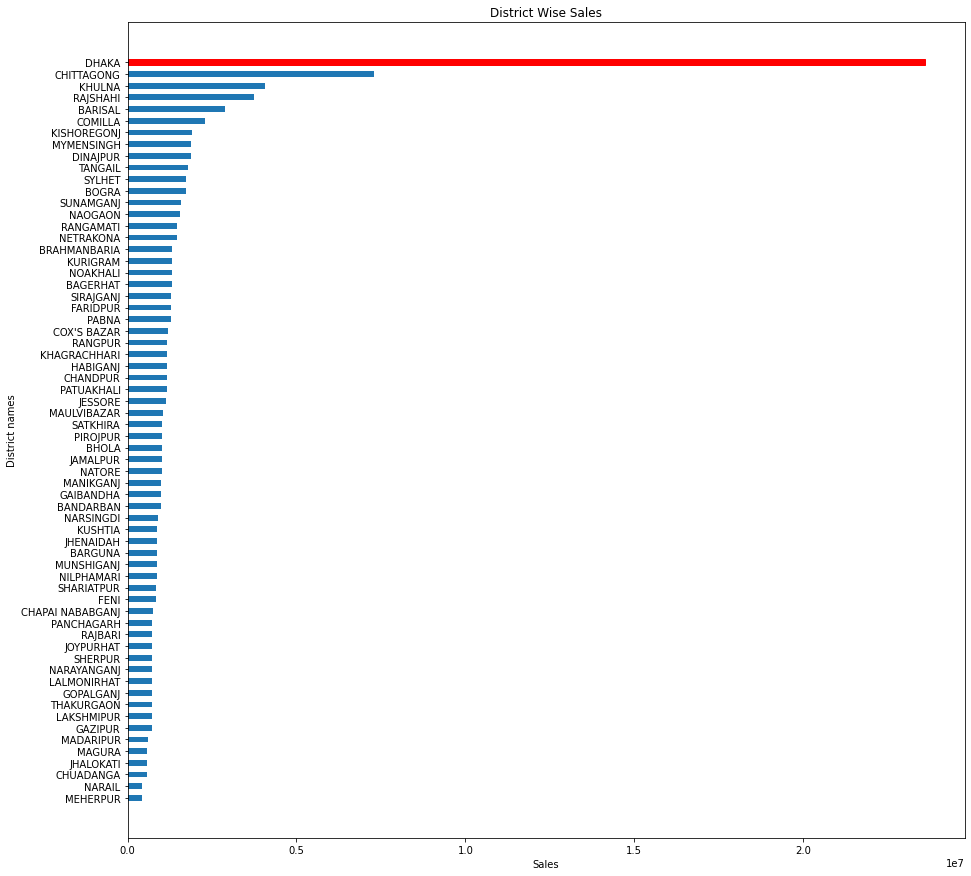

In [14]:
plt.figure(figsize = (15, 15))
barlist=plt.barh(dis['district'],dis['sales'], height=0.5)
barlist[63].set_color('r')
plt.title('District Wise Sales')
plt.xlabel('Sales')
plt.ylabel('District names') 
plt.show()

**YEAR WISE**

In [15]:
cur = con.cursor()
select_stmt_time = "SELECT  tim.year,  SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "GROUP BY CUBE(tim.year) " \
                    "ORDER BY tim.year"
cur.execute(select_stmt_time)
records_time = cur.fetchall()
time = pd.DataFrame(list(records_time), columns=['year', 'sales'])
time

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [16]:
time.dtypes

year     float64
sales     object
dtype: object

In [17]:
time=time.dropna()

In [18]:
time

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [19]:
changetype(time)

C:\Users\farih\AppData\Local\Temp/ipykernel_19116/369198803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


     year      sales
7  2021.0  883772.25


<AxesSubplot:title={'center':'Year Wise Sales'}, xlabel='year', ylabel='sales'>

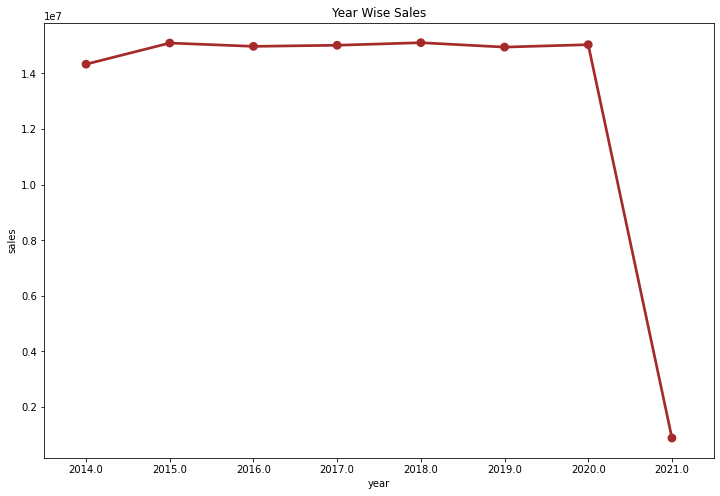

In [20]:
plt.figure(figsize = (12, 8))
plt.title('Year Wise Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
t=time.loc[time['year']==2021]
print(t)
sns.pointplot(data=time,x='year',y='sales',color='brown')

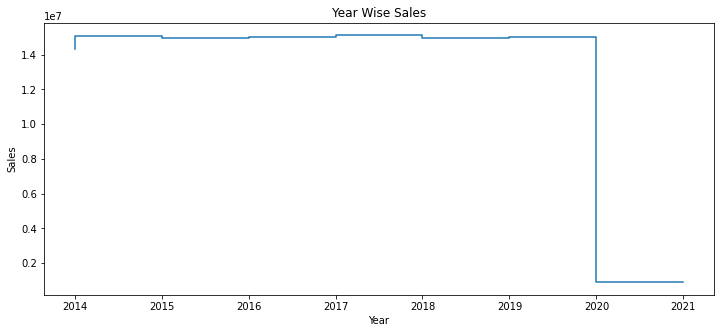

In [21]:
#plt.style.use('_mpl-gallery')
#ax.stem(x=time['year'],y=time['sales'])
plt.figure(figsize = (12, 5))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year Wise Sales')

plt.step(time['year'],time['sales'])
plt.show()

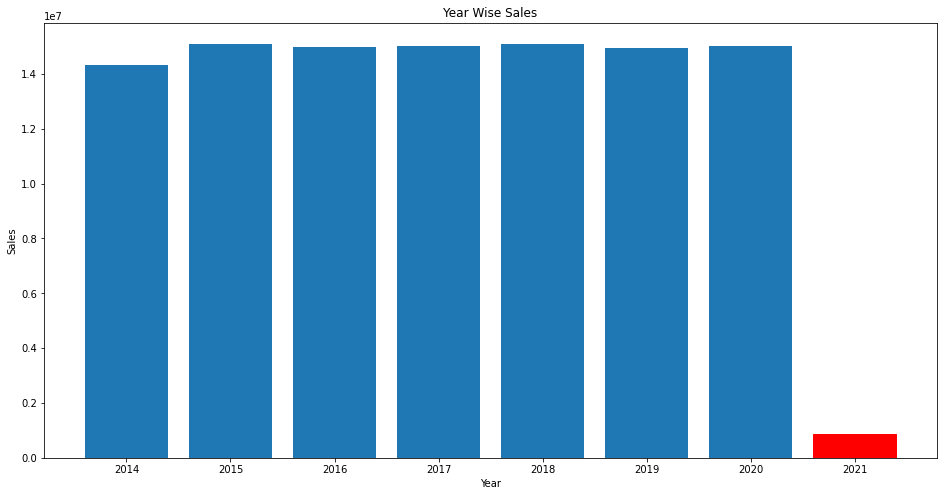

In [22]:
plt.figure(figsize = (16, 8))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year Wise Sales')
barlist=plt.bar(time['year'],time['sales'])
barlist[7].set_color('r')

plt.show()

**MONTH WISE**

In [23]:
cur = con.cursor()
select_stmt_month = "SELECT  tim.month, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "GROUP BY CUBE(tim.month) " \
                    "ORDER BY tim.month"
cur.execute(select_stmt_month)
records_month = cur.fetchall()
month = pd.DataFrame(list(records_month), columns=['month', 'sales'])
month=month.dropna()

In [24]:
month_name = ['January', 'February', 'March', 'April','May','June','July','August', 'September','October','November','December']
month['month_name']=month_name

In [25]:
changetype(month)

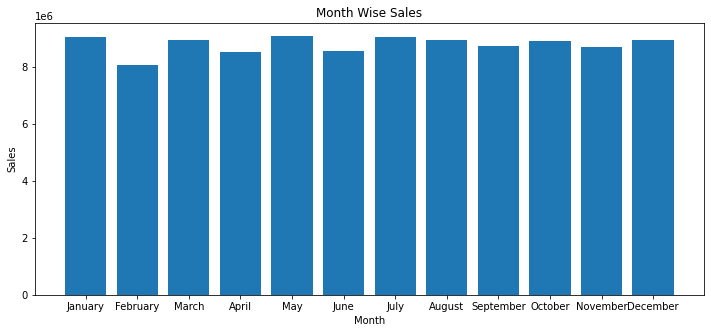

In [26]:
plt.figure(figsize = (12, 5))
plt.bar(month['month_name'],month['sales'])
plt.title('Month Wise Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [27]:
month2=month
month2.sort_values(by=["sales"],inplace=True)
month2

,month,sales,month_name
1,2.0,8073877.50,February
3,4.0,8504634.75,April
5,6.0,8556853.00,June
10,11.0,8680026.00,November
8,9.0,8724326.50,September
9,10.0,8902783.75,October
11,12.0,8923480.50,December
7,8.0,8929475.25,August
2,3.0,8939152.00,March
0,1.0,9042244.00,January


<AxesSubplot:title={'center':'Month Wise Sales'}, xlabel='month_name', ylabel='sales'>

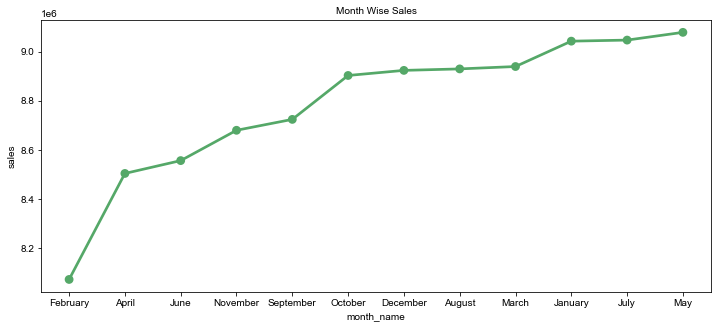

In [28]:
a4_dims = (12, 5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Month Wise Sales',fontsize=10)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Sales',fontsize=10)
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.set(style="darkgrid")
#sns.pointplot(month2['month_name'],month2['sales'],ax=ax,color='r')
sns.pointplot(data=month2,x='month_name',y='sales',ax=ax,color='g')

# Query - 2

**#Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table**

**CUSTOMER WISE**

In [29]:
cur = con.cursor()
select_stmt_cus = "SELECT  cus.name, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.coustomer_dim cus ON ft.coustomer_key=cus.coustomer_key " \
                    "GROUP BY CUBE(cus.name) " \
                    "ORDER BY cus.name"
cur.execute(select_stmt_cus)
records_cus = cur.fetchall()
cus = pd.DataFrame(list(records_cus), columns=['name', 'sales'])
cus=cus.dropna()

In [30]:
cus.dtypes

name     object
sales    object
dtype: object

In [31]:
cus2=cus
cus2.sort_values(by=["sales"],inplace=True,ascending=False)
cus2

,name,sales
2524,pooja,2109800.75
1201,jyoti,1331696.25
2272,neha,996121.00
4181,sunita,915543.75
2563,poonam,914285.25
...,...,...
74,ahsamin @ juhi,7554.25
3854,smt sujata,7496.25
1941,meenaxi,7113.50
397,bahwana,7105.50


In [32]:
changetype(cus2)

In [33]:
df=cus2[0:10]

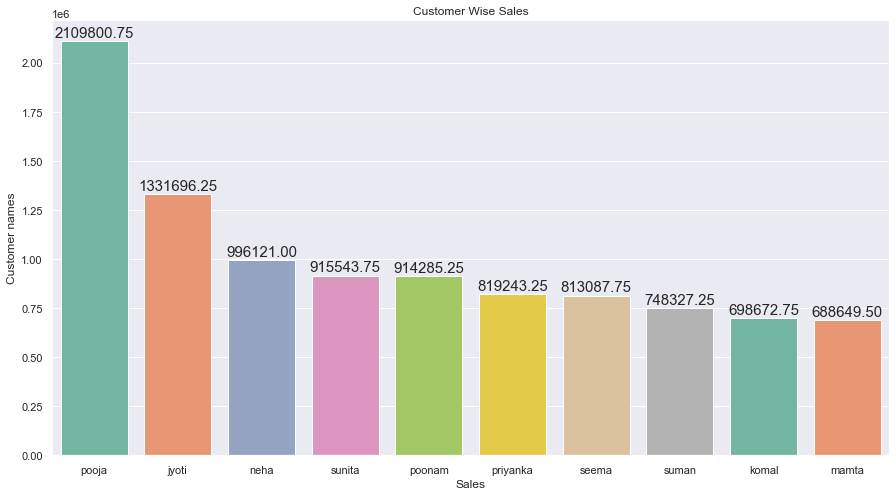

In [34]:
#Creating bar plot
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots=sns.barplot(x = df['name'],y = df['sales'],palette = "Set2")



for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
#Adding the aesthetics
plt.title('Customer Wise Sales')
plt.xlabel('Sales')
plt.ylabel('Customer names') 
# Show the plot
plt.show()

In [35]:
x=df.nlargest(1, 'sales').values
print('Customer '+str(x[::,0])+' has the highest purchase of '+str(x[::,1])+ 'taka')

Customer ['pooja'] has the highest purchase of [2109800.75]taka


In [36]:
df=cus[0:20]
df=df.set_index(['name'])

**BANK WISE**

In [37]:
cur = con.cursor()
select_stmt_bank = "SELECT  tr.bank_name, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.trans_dim tr ON ft.payment_key=tr.payment_key " \
                    "GROUP BY CUBE(tr.bank_name) " \
                    "ORDER BY SUM(ft.total_price) ASC"
cur.execute(select_stmt_bank)
records_bank = cur.fetchall()
bank = pd.DataFrame(list(records_bank), columns=['bank_name', 'sales'])
bank=bank.dropna()
bank

,bank_name,sales
0,Mutual Trust Bank Limited,2670030.50
1,Mercantile Bank Limited,2676578.50
2,Pubali Bank Limited,2682787.50
3,Community Bank Bangladesh Limited,2685751.50
4,Shimanto Bank Ltd,2685805.25
5,Bank Asia Limited,2687142.75
6,Eastern Bank Limited,2687182.25
7,Midland Bank Limited,2688430.25
8,Bkash,2689352.50
9,Jamuna Bank Limited,2689886.50


In [38]:
bank.dtypes

bank_name    object
sales        object
dtype: object

In [39]:
changetype(bank)

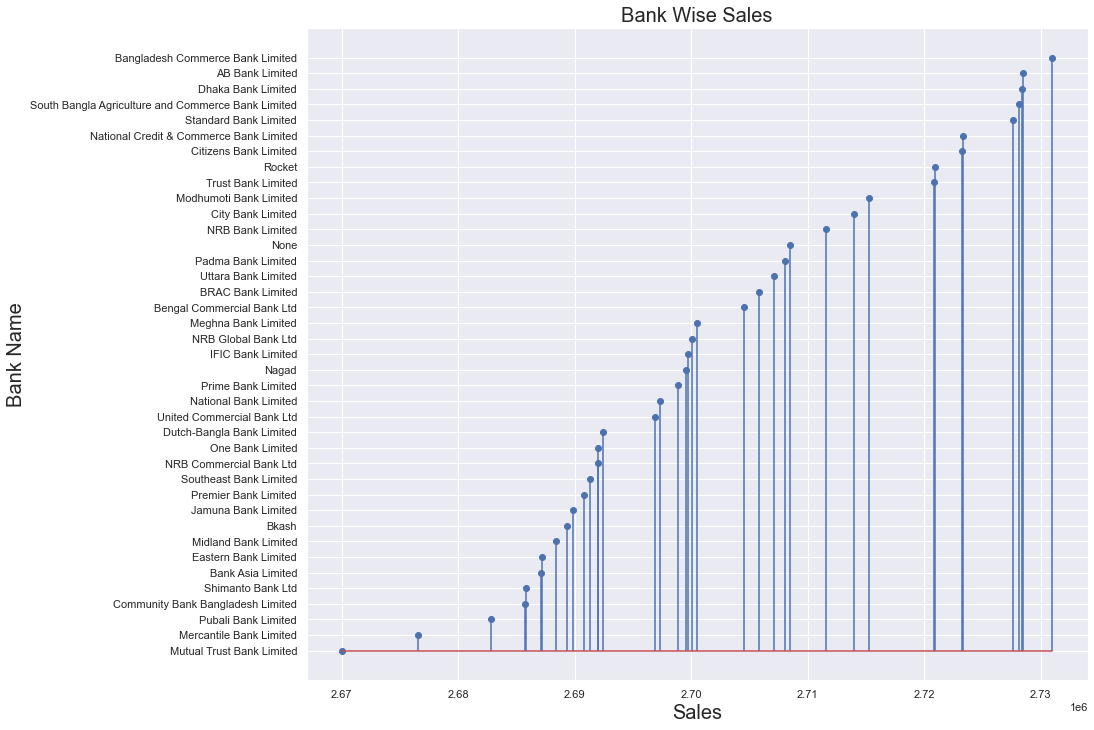

In [40]:
plt.figure(figsize = (14, 12))
bankdf= bank
plt.title('Bank Wise Sales',fontsize=20)
plt.ylabel('Bank Name',fontsize=20)
plt.xlabel('Sales',fontsize=20)
bank.sort_values(by=["sales"],inplace=True)
#plt.plot(bank.sales,bank.bank_name, linestyle = 'solid')
#sns.pointplot(x=bank.sales,y=bank.bank_name,color='r')
plt.stem(bank['sales'],bank['bank_name'])
plt.show()

**TRANSACTION WISE**

In [41]:
cur = con.cursor()
select_stmt_transtype = "SELECT  tr.trans_type, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.trans_dim tr ON ft.payment_key=tr.payment_key " \
                    "GROUP BY CUBE(tr.trans_type) " \
                    "ORDER BY tr.trans_type"
cur.execute(select_stmt_transtype)
records_transtype = cur.fetchall()
transtype = pd.DataFrame(list(records_transtype), columns=['trans_type', 'sales'])
transtype=transtype.dropna()

In [42]:
transtype.dtypes

trans_type    object
sales         object
dtype: object

In [43]:
changetype(transtype)

In [44]:
transtype = transtype.set_index(['trans_type'])

<AxesSubplot:ylabel='sales'>

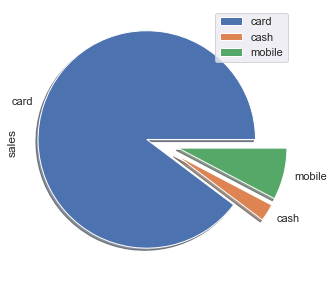

In [45]:
myexplode = [0.1, 0.2, 0.2]
transtype.plot.pie(y='sales',figsize=(5,5),shadow='True',explode=myexplode)

# Query - 3

**#Q3: Total sales in Barisal**

In [46]:
cur = con.cursor()
select_stmt_bari = "SELECT  s.division, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "WHERE s.division='BARISAL' "\
                    "GROUP BY CUBE(s.division)"
cur.execute(select_stmt_bari)
records_bari = cur.fetchall()
bar = pd.DataFrame(list(records_bari), columns=['division', 'sales'])
bar=bar.dropna()
bar

,division,sales
0,BARISAL,7520343.75


In [47]:
print('Total sales in Barisal is ' +str(bar['sales'][0]))

Total sales in Barisal is 7520343.75


# Query - 4

**#Q4:Total sales in 2015**

In [48]:
cur = con.cursor()
select_stmt_time2015 = "SELECT  tim.year, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "WHERE tim.year=2015 "\
                    "GROUP BY CUBE(tim.year)"
cur.execute(select_stmt_time2015)
records_time2015 = cur.fetchall()
time2015 = pd.DataFrame(list(records_time2015), columns=['year', 'sales'])
time2015=time2015.dropna()

In [49]:
print('Total sales in the year 2015 was ' +str(time2015['sales'][0]))

Total sales in the year 2015 was 15095720.25


# Query - 5

**#Q5:Total sales of Barisal in 2015**

In [50]:
cur = con.cursor()
select_stmt_bar2015 = "SELECT s.division, tim.year, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "WHERE s.division='BARISAL'" \
                    "GROUP BY CUBE(s.division,tim.year)" \
                    "ORDER BY tim.year"
cur.execute(select_stmt_bar2015)
records_bar2015 = cur.fetchall()
bar2015 = pd.DataFrame(list(records_bar2015), columns=['division','year', 'sales'])
bar2015=bar2015.dropna()

E:\Anaconda\envs\esrdlab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


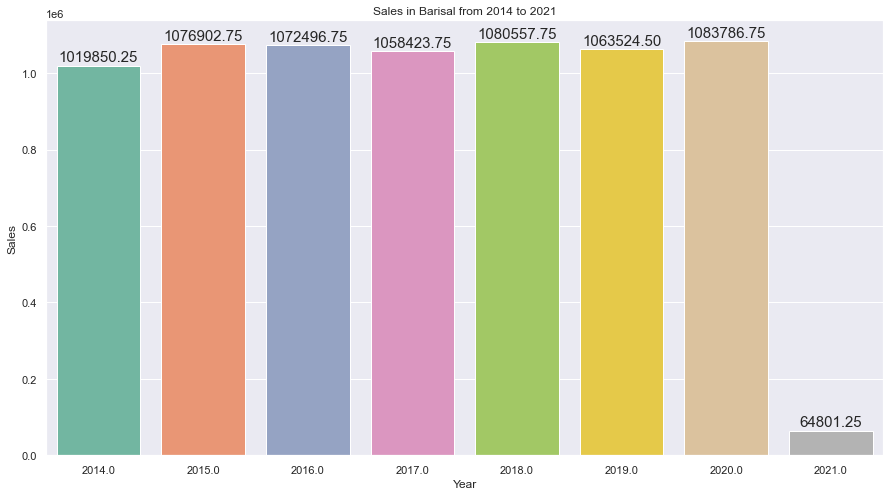

In [51]:
#Creating bar plot
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots_year=sns.barplot(bar2015['year'],bar2015['sales'],palette = "Set2")



for bar in plots_year.patches:
    plots_year.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
#Adding the aesthetics
plt.title('Sales in Barisal from 2014 to 2021')
plt.xlabel('Year')
plt.ylabel('Sales') 
# Show the plot
plt.show()

# Query - 6

**#Q6:For each store(item supplier), what are the top three products offered that are most often purchased?**

In [52]:
cur = con.cursor()
select_top3 = "SELECT s.store_key, i.item_name, sum(f.quantity) "\
                "FROM ecomdb_star_schema.fact_table f "\
                "JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key "\
                "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
                "GROUP by CUBE(s.store_key, i.item_name) " \
                "ORDER by s.store_key, sum(f.quantity) DESC"
cur.execute(select_top3)
records_top3 = cur.fetchall()
top3 = pd.DataFrame(list(records_top3), columns=['store_id', 'item', 'quantity'])
top3=top3.dropna()
top3 = top3.groupby('store_id').head(3)
top3.head(20)

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
261,S0002,Hefty Supreme Foam Bowls 12oz,78
518,S0003,Sprite - 12 oz cans,122
519,S0003,Diet Coke - 12 oz cans,109
520,S0003,Muscle Milk Protein Shake Van. 11oz,76
777,S0004,Kind Bars Variety Pack 1.4 oz,79


In [53]:
top3.dtypes

store_id    object
item        object
quantity     int64
dtype: object

In [54]:
top3

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
...,...,...,...
187322,S0098,Cliff Builders Protein Bar Variety Pack,84
187323,S0098,Pepsi - 12 oz cans,79
187581,S0099,Pepsi - 12 oz cans,93
187582,S0099,Diet Coke - 12 oz cans,87


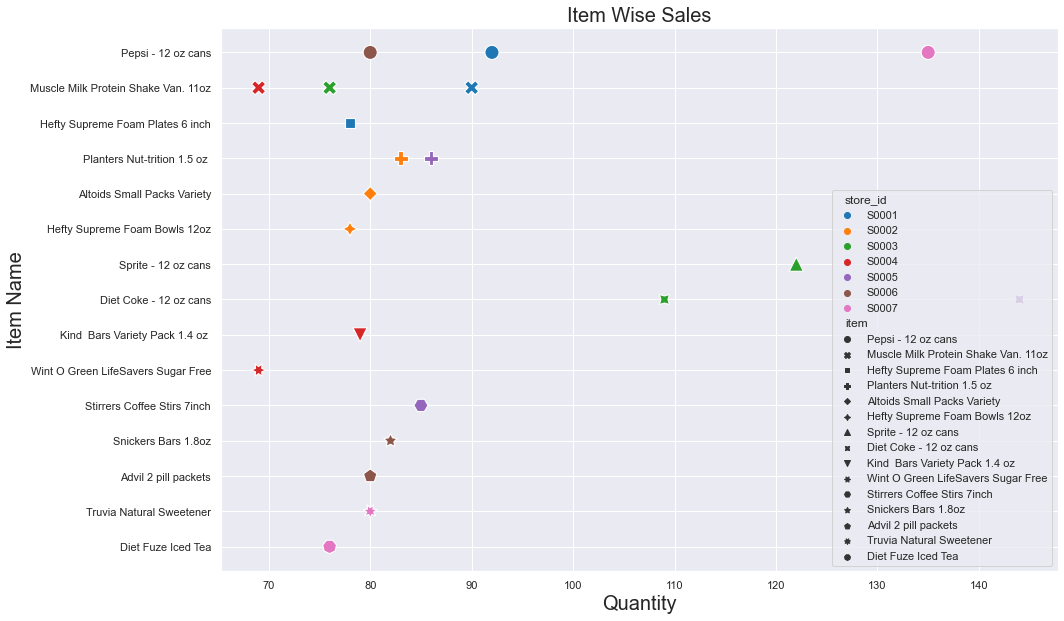

In [59]:
top_=top3[0:21]
plt.figure(figsize = (15, 10))
#plt.title('Year Wise Sales')
plt.title('Item Wise Sales',fontsize=20)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=top_, x="quantity", y="item", hue="store_id",palette='tab10',s=200,style="item")
sns.set(font_scale = 1)

<AxesSubplot:title={'center':'Store Wise Top 3 items Sales'}, xlabel='store_id', ylabel='quantity'>

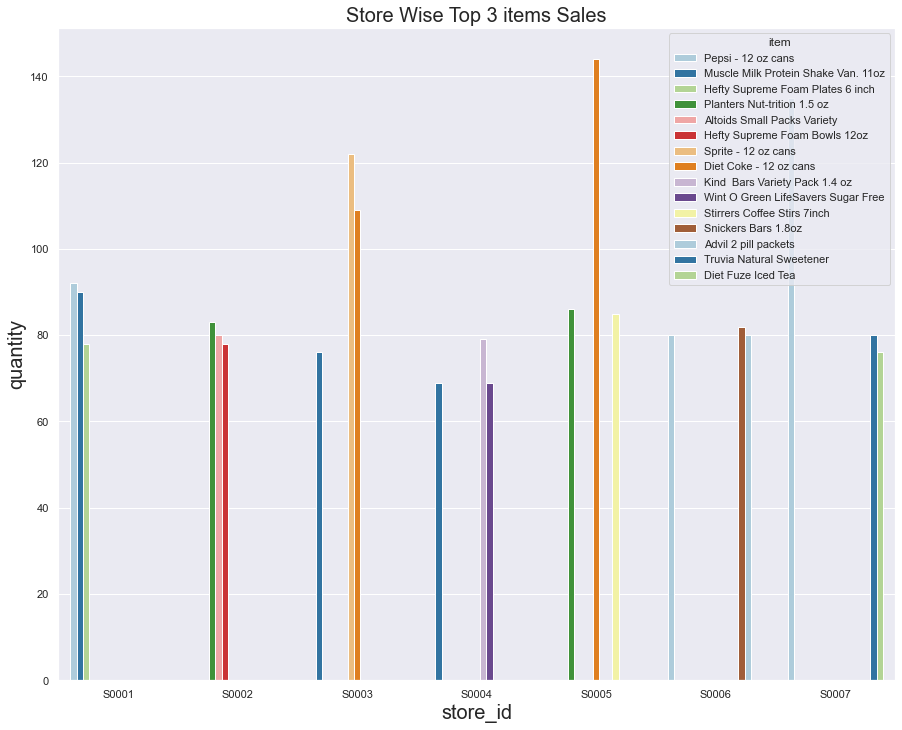

In [60]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set_theme()
sns.set(font_scale = 3)
sns.set_context("notebook")
plt.title('Store Wise Top 3 items Sales',fontsize=20)
plt.xlabel('Store_id',fontsize=20)
plt.ylabel('Quantity',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.barplot(x=top_['store_id'],y=top_['quantity'],hue=top_['item'],ax=ax,palette='Paired')

<AxesSubplot:xlabel='count', ylabel='item'>

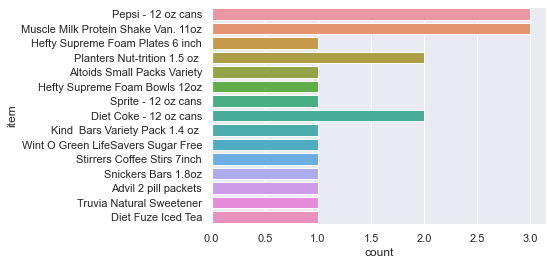

In [61]:
sns.countplot(y=top_['item'])

# Query - 7

**#Q7: What products have been sold through card or mobile since X days?**

**THROUGH CARD**

In [71]:
x=input('Enter number of days: ')

Enter number of days: 410


In [72]:
cur = con.cursor()
s1='''SELECT i.item_name,tim.dates,tt.trans_type 
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.dates>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND tt.trans_type='card'"

select_stmt_card = s1+s2
cur.execute(select_stmt_card)
records_card = cur.fetchall()
card = pd.DataFrame(list(records_card), columns=['item_name','dates', 'trans_type'])
card

,item_name,dates,trans_type
0,Waterloo Sparkling Mango 12oz,2021-01-16 14:04:00,card
1,Pop Chips Variety bags,2021-01-15 13:51:00,card
2,Diet Gingerale 12 oz cans,2021-01-17 20:54:00,card
3,Kind Bars Variety Pack 1.4 oz,2021-01-19 19:23:00,card
4,Famous Amos Cookies,2021-01-22 01:35:00,card
...,...,...,...
2695,Frito Classic Mix Variety,2021-01-21 04:38:00,card
2696,Diet Dr. Pepper - 12 oz cans,2021-01-21 08:29:00,card
2697,Hazelnut International Delight,2021-01-18 13:15:00,card
2698,Crunchy Granola Bars Oats & Honey,2021-01-16 02:02:00,card


In [73]:
card.dtypes

item_name             object
dates         datetime64[ns]
trans_type            object
dtype: object

**THROUGH MOBILE**

In [74]:
cur = con.cursor()
s1='''SELECT i.item_name,tim.dates,tt.trans_type 
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.dates>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND tt.trans_type='mobile' "

select_stmt_mob = s1+s2
cur.execute(select_stmt_mob)
records_mob = cur.fetchall()
mob = pd.DataFrame(list(records_mob), columns=['item_name','dates', 'trans_type'])
mob

,item_name,dates,trans_type
0,Red Bull Sugar Free 8.4 oz,2021-01-17 18:59:00,mobile
1,Dixie Perfecttouch Paper Cups 12oz,2021-01-21 01:22:00,mobile
2,La Croix Sparkling Lemon 12 oz,2021-01-19 17:09:00,mobile
3,Clear Plastic 12 oz Cups,2021-01-16 05:35:00,mobile
4,Austin Toasty Crackers w/ PBtr,2021-01-18 20:21:00,mobile
...,...,...,...
237,Hershey Factory Favorites Mix,2021-01-17 16:23:00,mobile
238,Cherry Coke 12oz,2021-01-15 16:33:00,mobile
239,Cheetos Flamin' Hot 1 oz,2021-01-16 06:36:00,mobile
240,La Croix Sparkling Lemon 12 oz,2021-01-20 15:02:00,mobile


In [75]:
cur = con.cursor()
s1='''SELECT tt.trans_type,COUNT(*)
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.dates>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND (tt.trans_type='card' OR tt.trans_type='mobile') GROUP BY ROLLUP(trans_type) "

select_stmt_mobcard = s1+s2
cur.execute(select_stmt_mobcard)
records_mobcard = cur.fetchall()
mobcard = pd.DataFrame(list(records_mobcard), columns=['trans_type','count'])
mobcard

,trans_type,count
0,None,2942
1,mobile,242
2,card,2700


In [76]:
mobcard.dtypes

trans_type    object
count          int64
dtype: object

<AxesSubplot:ylabel='count'>

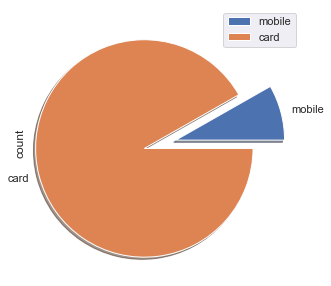

In [77]:
myexplode = [0.1, 0.2]
mobcard = mobcard.set_index(['trans_type'])
l=mobcard[1:3]
l.plot.pie(y='count',figsize=(5,5),shadow='True',explode=myexplode)

# Query - 8

**#Q8: What season(quarter) is the worst for each product item?**

In [78]:
cur = con.cursor()
s_quarter = "SELECT i.item_name, tim.quarter, SUM(ft.total_price) "\
"FROM ecomdb_star_schema.fact_table ft "\
"JOIN ecomdb_star_schema.item_dim i on i.item_key=ft.item_key "\
"JOIN ecomdb_star_schema.time_dim tim on tim.time_key = ft.time_key "\
"GROUP BY i.item_name, tim.quarter "\
"ORDER BY i.item_name, sum(ft.total_price)"
cur.execute(s_quarter)
sq = cur.fetchall()
quarter_info = pd.DataFrame(list(sq), columns=['item', 'quarter', 'sales'])
quarter_info = quarter_info.dropna()
#quarter_info = quarter_info.groupby('quarter').head(10)
quarter_info

,item,quarter,sales
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
1,100% Juice Box Variety 6.75 oz,Q4,87090.0
2,100% Juice Box Variety 6.75 oz,Q2,88140.0
3,100% Juice Box Variety 6.75 oz,Q3,90675.0
4,A&W Root Beer - 12 oz cans,Q2,65952.5
...,...,...,...
1031,Yoplait Original Yogurt Variety Pack,Q3,69132.0
1032,Zoo Animal Cookies/Crackers,Q1,76468.0
1033,Zoo Animal Cookies/Crackers,Q2,77112.0
1034,Zoo Animal Cookies/Crackers,Q4,77280.0


In [79]:
quarter_info2=quarter_info = quarter_info.groupby('item').head(1)
quarter_info

,item,quarter,sales
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
4,A&W Root Beer - 12 oz cans,Q2,65952.5
8,A&W Root Beer Diet - 12 oz cans,Q4,37725.75
12,Advil 2 pill packets,Q1,76342.0
16,All Purpose Cleaner 409 Spray,Q1,95850.0
...,...,...,...
1016,Welch's 100% Juice Variety10 oz,Q2,93398.0
1020,Wint O Green LifeSavers Sugar Free,Q1,85168.0
1024,Wonderful Pistachios (in shell),Q1,122716.0
1028,Yoplait Original Yogurt Variety Pack,Q1,65112.0


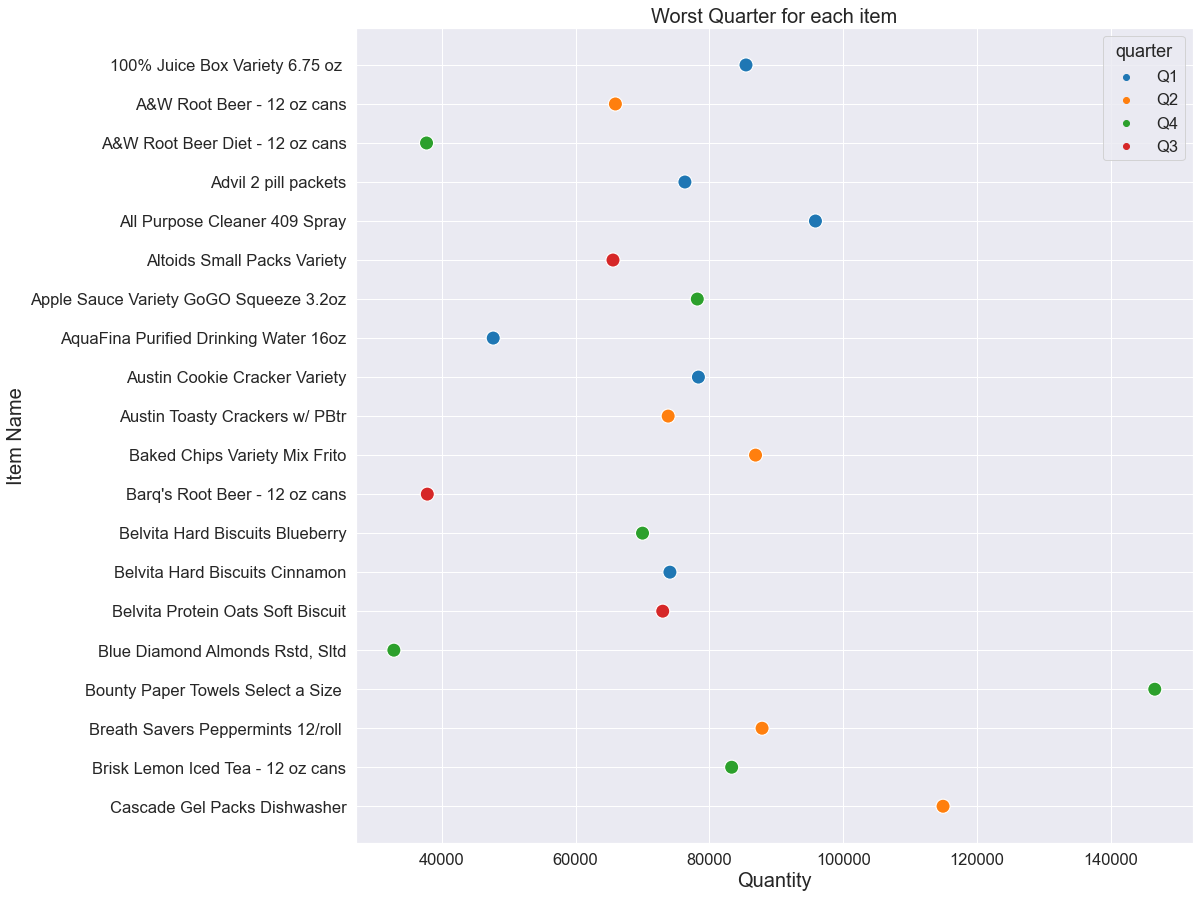

In [80]:
quarter_info=quarter_info[0:20]
plt.figure(figsize = (15, 15))
#plt.title('Year Wise Sales')
sns.set(font_scale = 1.5)
plt.title('Worst Quarter for each item',fontsize=20)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=quarter_info, x="sales", y="item", hue="quarter",palette='tab10',s=200)
sns.set(font_scale = 1)

In [81]:
quarter_info2

,item,quarter,sales
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
4,A&W Root Beer - 12 oz cans,Q2,65952.5
8,A&W Root Beer Diet - 12 oz cans,Q4,37725.75
12,Advil 2 pill packets,Q1,76342.0
16,All Purpose Cleaner 409 Spray,Q1,95850.0
...,...,...,...
1016,Welch's 100% Juice Variety10 oz,Q2,93398.0
1020,Wint O Green LifeSavers Sugar Free,Q1,85168.0
1024,Wonderful Pistachios (in shell),Q1,122716.0
1028,Yoplait Original Yogurt Variety Pack,Q1,65112.0


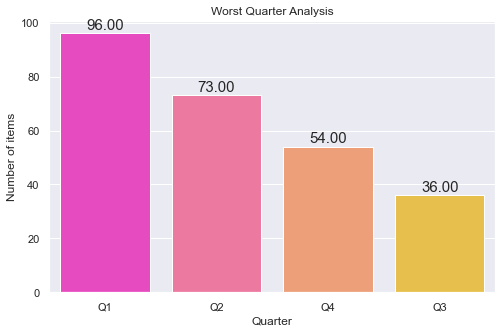

In [82]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plott=sns.countplot(x=quarter_info2['quarter'],palette='spring')
for bar in plott.patches:
    plott.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
#Adding the aesthetics
plt.title('Worst Quarter Analysis')
plt.xlabel('Quarter')
plt.ylabel('Number of items') 

# Show the plot
plt.show()

# Query - 9

**#Q9: Break down the total sales of items geographically (division-wise).**

In [83]:
select_items = "SELECT i.item_name, s.division, sum(ft.total_price) "\
            "FROM ecomdb_star_schema.fact_table ft "\
            "JOIN ecomdb_star_schema.item_dim i on i.item_key=ft.item_key "\
            "JOIN ecomdb_star_schema.store_dim s on s.store_key = ft.store_key "\
            "GROUP BY CUBE(i.item_name, s.division) "\
            "ORDER BY i.item_name,s.division "
cur.execute(select_items)
itemsdiv = cur.fetchall()
idiv = pd.DataFrame(list(itemsdiv), columns=['Item', 'Division', 'Sales'])
idiv = idiv.dropna()
#pd_data.set_index("Division", inplace = True)
#pd_data['Sales'] = pd_data['Sales'].astype('float64')
idiv.head(30)
#pd_data.plot.pie(y='Sales', figsize=(15,10))

,Item,Division,Sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
5,100% Juice Box Variety 6.75 oz,RANGPUR,26685.0
6,100% Juice Box Variety 6.75 oz,SYLHET,18270.0
8,A&W Root Beer - 12 oz cans,BARISAL,19101.5
9,A&W Root Beer - 12 oz cans,CHITTAGONG,52060.5
10,A&W Root Beer - 12 oz cans,DHAKA,107479.0


<AxesSubplot:title={'center':'Division wise items Sales'}, xlabel='Sales', ylabel='Item'>

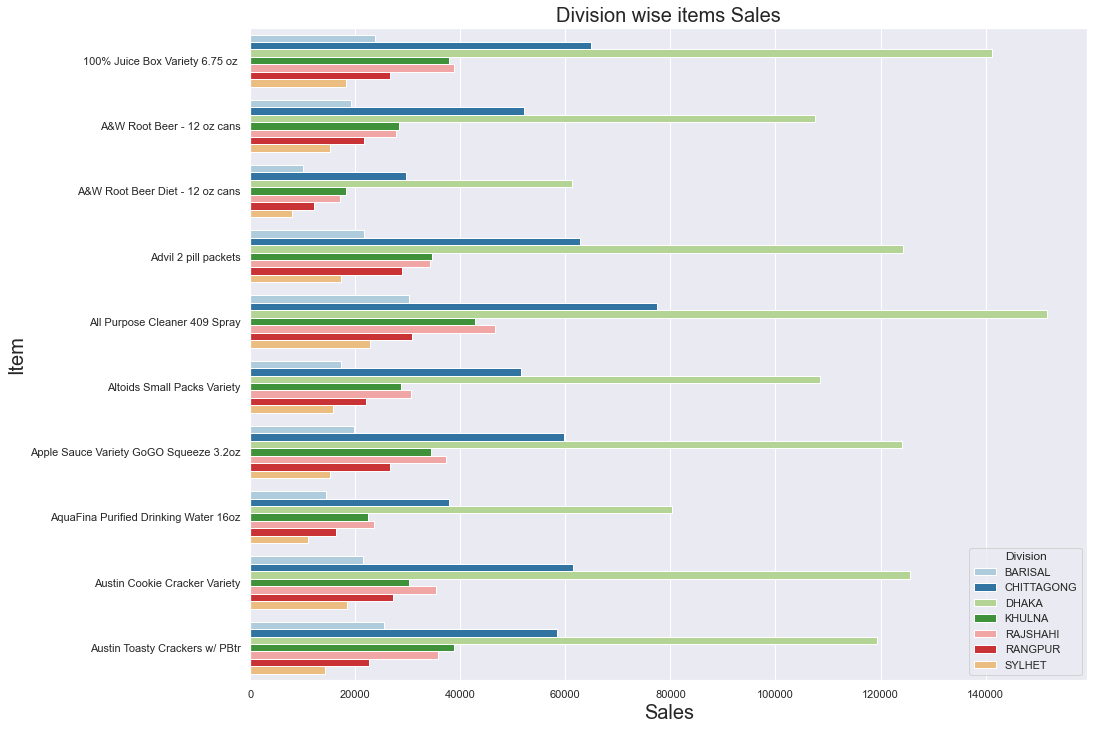

In [84]:
idiv2=idiv[0:70]
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set(font_scale = 1)
plt.title('Division wise items Sales',fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Sales',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.barplot(data=idiv2,x='Sales',y='Item',hue='Division',ax=ax,palette='Paired')

In [85]:
idi=idiv
idi.sort_values(by=["Sales"],ascending=False,inplace=True)

In [86]:
idi=idi.groupby('Division').head(1)
idi

,Item,Division,Sales
1650,Red Bull 12oz,DHAKA,510895.0
1649,Red Bull 12oz,CHITTAGONG,246510.0
1652,Red Bull 12oz,RAJSHAHI,148885.0
1651,Red Bull 12oz,KHULNA,139645.0
973,K Cups Daily Chef Columbian Supremo,RANGPUR,101866.0
1648,Red Bull 12oz,BARISAL,95205.0
974,K Cups Daily Chef Columbian Supremo,SYLHET,69165.0


E:\Anaconda\envs\esrdlab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Division wise items Sales'}, xlabel='Item', ylabel='Sales'>

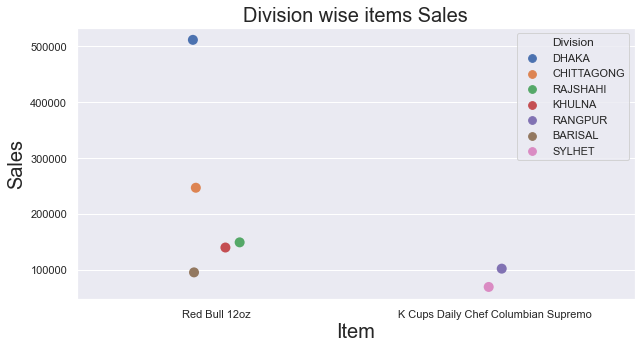

In [87]:
a_dims = (10, 5)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set(font_scale = 1)
plt.title('Division wise items Sales',fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Sales',fontsize=20)
sns.stripplot(idi['Item'],idi['Sales'],hue=idi['Division'],s=10)

# Query - 10

**Q10: What are the average sales of products sales per store monthly?**

In [88]:
cur = con.cursor()
select_avg = "SELECT s.store_key, tim.month, avg(ft.total_price) "\
                "FROM ecomdb_star_schema.fact_table ft "\
                "JOIN ecomdb_star_schema.store_dim s on s.store_key = ft.store_key "\
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key = ft.time_key "\
                "GROUP BY s.store_key, tim.month "\
                "ORDER BY s.store_key, tim.month "
cur.execute(select_avg)
avg = cur.fetchall()
avgmon = pd.DataFrame(list(avg), columns=['store_id', 'month', 'average sales'])
print(avgmon)
#pd_data.plot.bar(x='Month', y='Avg. Sales', rot=0, figsize=(15,10))

     store_id  month         average sales
0       S0001      1   97.7543103448275862
1       S0001      2  100.5776699029126214
2       S0001      3  109.4158878504672897
3       S0001      4   98.8805309734513274
4       S0001      5   99.5245535714285714
...       ...    ...                   ...
8707    S0099      8   96.2933673469387755
8708    S0099      9  114.1365740740740741
8709    S0099     10  102.7897727272727273
8710    S0099     11  107.3810679611650485
8711    S0099     12  102.9014423076923077

[8712 rows x 3 columns]


E:\Anaconda\envs\esrdlab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='average sales'>

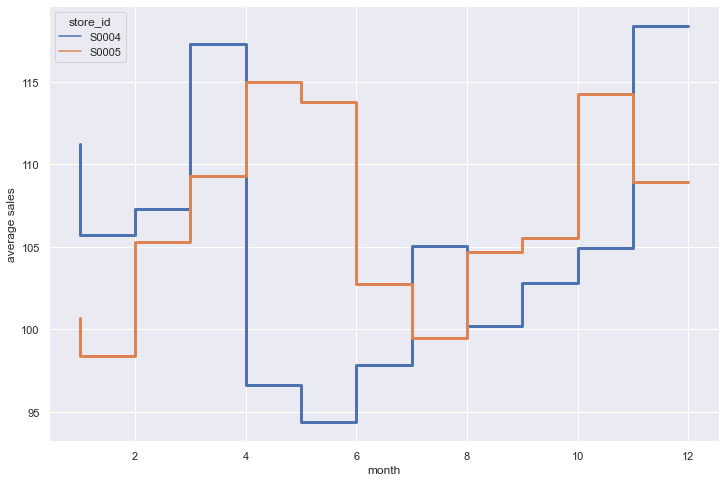

In [89]:
avgmon2=avgmon[36:60]
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
sns.lineplot(avgmon2['month'],avgmon2['average sales'], drawstyle='steps-pre',ax=ax,hue=avgmon2['store_id'],linewidth='3')

<AxesSubplot:xlabel='quantity', ylabel='store_id'>

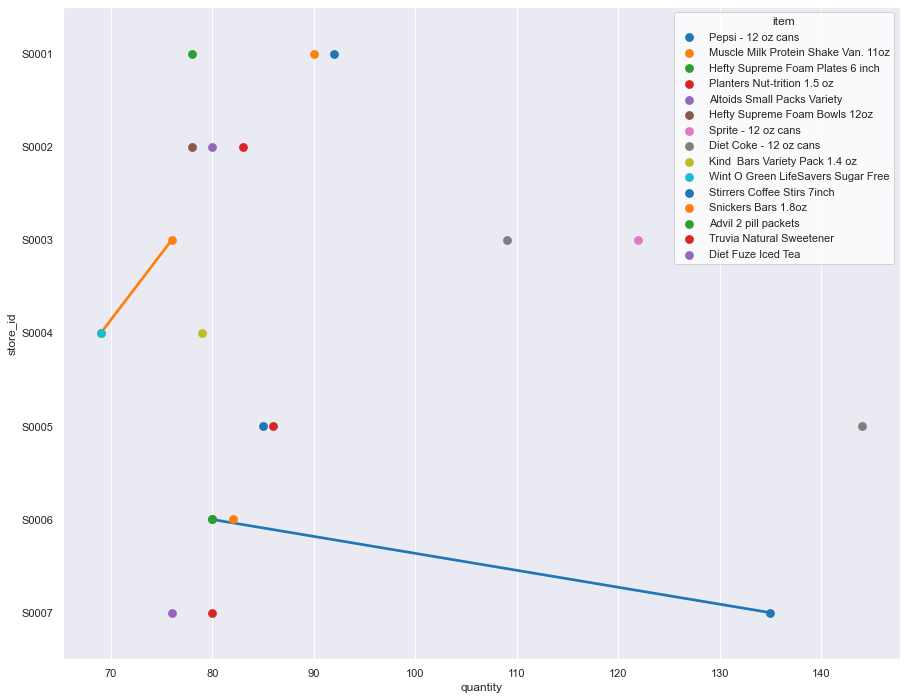

In [58]:
top_=top3[0:21]
a4_dims = (15, 12)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.set(style="whitegrid")
#sns.pointplot(month2['month_name'],month2['sales'],ax=ax,color='r')
sns.pointplot(data=top_,x='quantity',y='store_id',ax=ax,hue='item',palette='tab10')

<AxesSubplot:xlabel='month', ylabel='sales'>

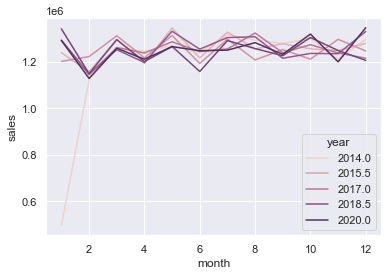

In [57]:
import seaborn as sns
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="month", y="sales",
             hue="year", 
             data=time)